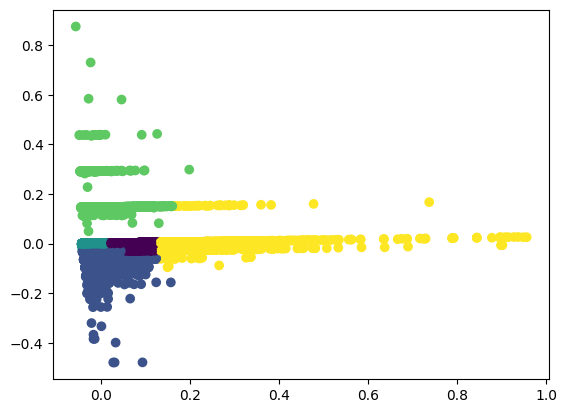

In [ ]:
model = KMeans(n_clusters=5, n_init=10, random_state=42)
values = model.fit_predict(scaled)
plt.scatter(a[:, 0], a[:, 1], c=values)


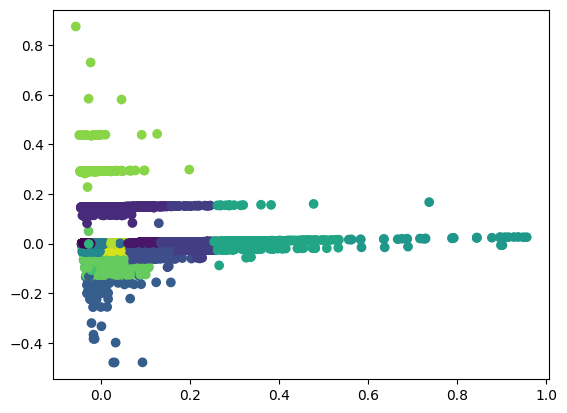

In [ ]:
model = KMeans(n_clusters=18, n_init=10, random_state=42)
values = model.fit_predict(scaled)
plt.scatter(a[:, 0], a[:, 1], c=values)

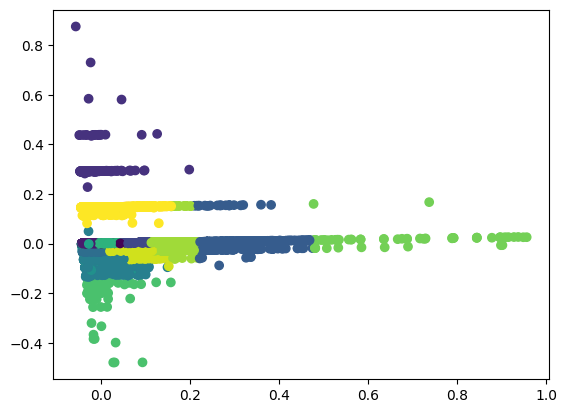

In [ ]:
model = KMeans(n_clusters=15, n_init=10, random_state=42)
values = model.fit_predict(scaled)
plt.scatter(a[:, 0], a[:, 1], c=values)

In [ ]:
df["cluster"] = values

In [ ]:
ans = pd.DataFrame()
ans["Segment"] = np.arange(15)

In [ ]:
ans

,Segment
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
df_start["cluster"] = df["cluster"]

In [ ]:
for column in df_start.columns:
  if column == "cluster" or column == "Phone_new":
    continue
  arr = np.array(range(15), dtype=np.float64)
  for i in range(15):
    arr[i] = df_start[df_start["cluster"] == i][column].mean()
  ans[column] = arr

In [ ]:
ans

,Segment,Кол-во чеков,Quant,RowDiscount,Общая сумма чеков,Source_Колл-центр,Source_Онлайн-Резерв.,Source_Сайт,Source_Терминал,PaymentType_Безналичная,...,TN_Крупная бытовая техника,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Цифровая Техника,Среднее кол-во товаров в чеке,Средняя сумма в чеке
0,0,1.128325,1.230475,451.840179,15283.599489,0.000000,1.223026,0.000000,0.000426,1.130028,...,0.234407,0.030720,0.139089,0.075326,0.088813,0.061225,0.004102,0.222498,1.091754,12302.526005
1,1,1.090054,1.309724,70.751881,3528.496765,0.000000,1.231341,0.000000,0.011175,0.000000,...,0.042164,0.069483,0.295921,0.106859,0.089142,0.031369,0.057157,0.069183,1.194866,2800.008921
2,2,2.036810,2.858896,185.852761,20551.042945,0.012270,0.607362,2.177914,0.000000,0.337423,...,0.152635,0.074131,0.182315,0.100797,0.067229,0.057491,0.033487,0.112474,1.656545,6865.565002
3,3,1.379946,1.509065,598.625729,32558.557307,0.000000,1.499606,0.000000,0.006937,0.219455,...,0.508585,0.004628,0.062885,0.042979,0.035328,0.137650,0.001297,0.157663,1.085628,22100.223989
4,4,1.055911,1.081470,1160.477636,68272.519169,0.246006,0.797125,0.035144,0.003195,0.295527,...,0.436102,0.002130,0.038072,0.023163,0.030351,0.192492,0.000000,0.273695,1.025559,63152.921060
5,5,1.066053,1.165623,9.627747,4898.387477,1.000000,0.088643,0.000000,0.000859,0.107919,...,0.083271,0.081606,0.271357,0.123533,0.093371,0.037733,0.037442,0.081804,1.073789,4417.409065
6,6,1.415593,2.775773,80.972294,16033.122423,2.299613,0.206186,0.000644,0.000644,0.329897,...,0.158234,0.082991,0.130905,0.113399,0.095397,0.035285,0.056979,0.086424,2.202351,5963.293387
7,7,1.785530,4.612403,551.028424,19432.043928,0.113695,3.984496,0.001292,0.000000,3.934109,...,0.087651,0.073182,0.123576,0.170199,0.112487,0.029671,0.117532,0.062308,3.131998,4452.559443
8,8,1.077198,1.258737,100.025401,3913.476965,0.000000,1.180211,0.000000,0.000083,1.122520,...,0.036634,0.068813,0.306314,0.109044,0.076164,0.028452,0.050919,0.086602,1.169512,3258.304165
9,9,1.411765,1.542528,360.956916,17371.384738,0.000000,1.526471,0.000000,0.008347,0.000079,...,0.246307,0.024216,0.158376,0.086224,0.101975,0.069666,0.004061,0.169179,1.093751,10938.234359


In [ ]:
ans.to_csv("tmp.csv")

In [ ]:
ans.to_excel("tmp.xlsx")

In [ ]:
df = pd.read_csv("vitrina.csv")

In [ ]:
from sklearn.manifold import TSNE

feautures = df.loc[:, "Кол-во чеков":"Средняя сумма в чеке"]
tsne = TSNE(n_components=2, perplexity=20, random_state=1000)
projections = tsne.fit_transform(feautures)

In [ ]:
projections.tofile("projections.tmp")

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(projections)
labels = dbscan.labels_
df["cluster"] = labels


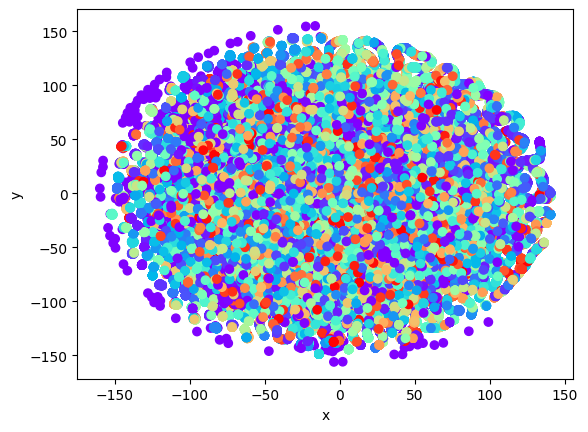

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(projections.T[0], projections.T[1], c=df["cluster"], cmap="rainbow")

Text(0, 0.5, 'Количество сегментов')

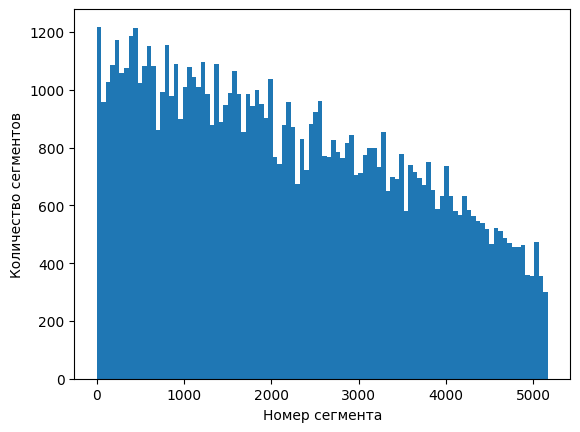

In [ ]:
plt.hist(df[df["cluster"] != -1]["cluster"], bins=100)
plt.xlabel("Номер сегмента")
plt.ylabel("Количество сегментов")

1461 16938


Text(0, 0.5, 'Количество сегментов')

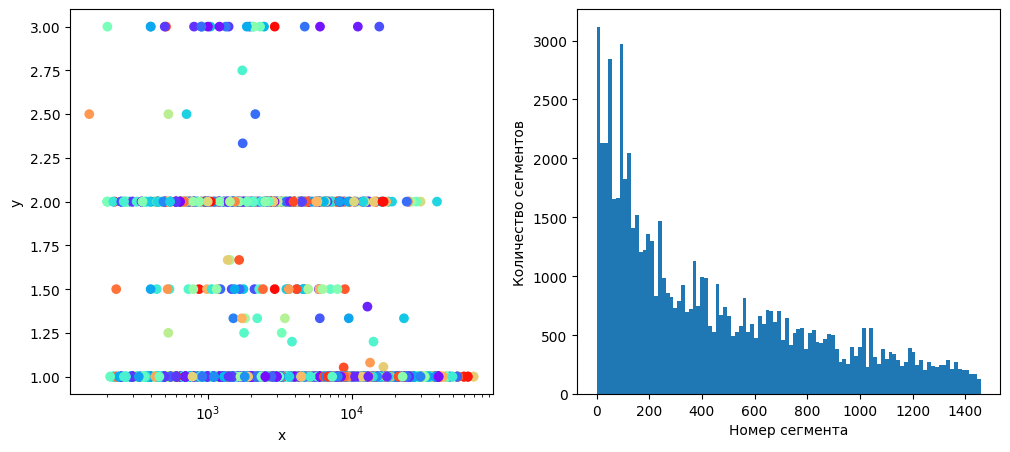

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(df.loc[:, ['Средняя сумма в чеке', 'Среднее кол-во товаров в чеке']])
labels = dbscan.labels_
df['cluster'] = dbscan.labels_
print(df.cluster.nunique(), len(df[df.cluster == -1]))
df_n = df[df.cluster != -1].sample(10000)

plt.gcf().set_size_inches(12, 5)

plt.subplot(1, 2, 1)
plt.scatter(df_n['Средняя сумма в чеке'], df_n['Среднее кол-во товаров в чеке'], c=df_n['cluster'], cmap='rainbow')
plt.xscale('log')
plt.xlabel("x")
plt.ylabel("y")


plt.subplot(1, 2, 2)
plt.hist(df[df.cluster != -1].cluster, bins=100)
plt.xlabel("Номер сегмента")
plt.ylabel("Количество сегментов")